In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ale_py import ALEInterface
from ale_py.roms import LostLuggage
import gymnasium as gym
from tqdm import tqdm

In [2]:
ale = ALEInterface()
ale.loadROM(LostLuggage)

In [3]:
env = gym.make('ALE/LostLuggage-v5', render_mode='human')

: 

In [8]:
class QLearningAgent:
    def __init__(self, n_actions,
                 learning_rate = 0.15,
                 discount_factor = 0.85,
                 epsilon = 0.1):
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.Q = np.zeros((n_actions,))
    
    def choose_action(self):
        if np.random.rand() < self.epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(self.Q)
        return action
    
    def update_Q(self, action, reward):
        max_Q = np.max(self.Q)
        current_Q = self.Q[action]
        td_target = reward + self.discount_factor * max_Q
        td_error = td_target - current_Q
        self.Q[action] += self.learning_rate * td_error

    def train(self, env, n_episodes):
        episode_rewards = []

        for _ in tqdm(range(n_episodes)):
            env.reset()
            done = False
            total_reward = 0

            while not done:
                action = self.choose_action()
                _, reward, done, _, _ = env.step(action)
                total_reward += reward
                self.update_Q(action, reward)
            
            episode_rewards.append(total_reward)
        
        return episode_rewards

In [9]:
agent = QLearningAgent(n_actions=env.action_space.n)

In [10]:
episode_rewards = agent.train(env=env, n_episodes=30)

100%|██████████| 30/30 [30:20<00:00, 60.67s/it]


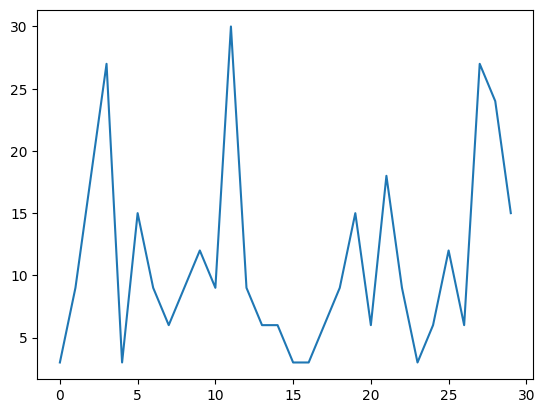

In [12]:
plt.plot(range(30), episode_rewards)